# Lab1 KNN
- 姓名：管昀玫
- 学号：2013750
- 专业：计算机科学与技术

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

<ipython-input-2-14e503bfd0bb>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

In [4]:
# KNN算法手动实现
def MyKnnClassifier(X_train, X_test, y_train, y_test, k):
    
    trainShape = X_train.shape[0]   # 获得训练集的大小
    testShape = X_test.shape[0]    # 获得测试集的大小
    '''
    print(np.shape(X_train))
    print(np.shape(X_test))
    print(np.shape(y_train))
    '''
    testRes = []  # 存放测试结果
    acc = 0   # 计算准确率
    # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
    testDiffMat = np.tile(X_test[0],(trainShape , 1)) - X_train
    sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
    # 方差距离为方差矩阵的整行求和，是一个一位列向量
    sqTestDiffDis = sqTestDiffMat.sum(axis=1)
    testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
    sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
    labelCount = []
    for j in range(k):  # 考察k近邻属于哪些类
        labelCount.append(y_train[sortIndex[j]][0])
    classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
    classifyRes = classifyRes.most_common(2)[0][0]
    testRes.append(classifyRes)
    # print(np.shape(classifyRes))
    if classifyRes == y_test[0]:  # 分类正确则将accRate+1
        acc += 1
    '''
    accRate = acc / X_test.shape[0]
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(k,X_test.shape[0],acc,accRate))
    return accRate
    '''
    return acc

In [5]:
# 留一法
def leave_one_out_cross_validation(data, all_labels, k=1):
    all_accuracy = []
    acc = 0
    for i in range(0, len(data)):
        test_instance = data[i:i+1,:]
        test_label = all_labels[i:i+1,:]
        
        train_instances = np.vstack((data[0:i,:],data[i+1:-1,:]))
        train_labels = np.vstack((all_labels[0:i,:],all_labels[i+1:-1,:]))
        '''
        print(np.shape(test_instance))
        print(np.shape(test_label))
        print(np.shape(train_instances))
        print(np.shape(train_labels))
        '''
        prediction = MyKnnClassifier(train_instances, test_instance, train_labels, test_label, k)
        acc += prediction
        '''
        if (prediction == test_label):
            all_accuracy.append(1) # Correct pred
        else:
            all_accuracy.append(0) # Incorrect pred
        '''
    accRate = acc / data.shape[0]
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(k,data.shape[0],acc,accRate))
    # return sum(all_accuracy)/len(all_accuracy) # Mean
    return accRate

实验结果：

In [29]:
leave_one_out_cross_validation(X, y, 1)
# leave_one_out_cross_validation(X, y, 3)
# leave_one_out_cross_validation(X, y, 5)

k=1时，测试个数为1593  正确个数为：1462  准确率为：0.9177652228499686


0.9177652228499686

In [27]:
leave_one_out_cross_validation(X, y, 3)
leave_one_out_cross_validation(X, y, 5)

k=3时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=5时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521


0.9165097300690521

In [8]:
# 这是用普通分割数据集方法的结果，仅作对比使用
MyKnnClassifier_(X, y, 1)
MyKnnClassifier_(X, y, 3)
MyKnnClassifier_(X, y, 5)

(1274, 256)
(319, 256)
(1274, 1)
(319, 1)
k=1时，测试个数为319  正确个数为：297  准确率为：0.9310344827586207
(1274, 256)
(319, 256)
(1274, 1)
(319, 1)
k=3时，测试个数为319  正确个数为：297  准确率为：0.9310344827586207
(1274, 256)
(319, 256)
(1274, 1)
(319, 1)
k=5时，测试个数为319  正确个数为：297  准确率为：0.9310344827586207


0.9310344827586207

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

In [11]:
# kNN算法sklearn库实现
def KnnClassifier(data_X, data_y, neighbors, flag=0):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train.ravel())
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(neighbors,knn.score(X_test, y_test)))
    # 交叉验证
    if flag == 1:
        scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
        return scores.mean()

实验结果：

In [7]:
KnnClassifier(X, y, 1)
KnnClassifier(X, y, 3)
KnnClassifier(X, y, 5)

k=1时，scikit-learn训练手写体识别的准确率为：0.8840125391849529
k=3时，scikit-learn训练手写体识别的准确率为：0.8683385579937304
k=5时，scikit-learn训练手写体识别的准确率为：0.9278996865203761


### Weka k = 1

Attributes:   257
              [list of attributes omitted]
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

IB1 instance-based classifier
using 1 nearest neighbour(s) for classification


Time taken to build model: 0 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        1457               91.4626 %  
Incorrectly Classified Instances       136                8.5374 %  
Kappa statistic                          0.9051  
Mean absolute error                      0.018   
Root mean squared error                  0.1277  
Relative absolute error                  9.9937 %  
Root relative squared error             42.5761 %  
Total Number of Instances             1593      

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.981    0.004    0.963      0.981    0.972      0.969    0.987     0.948     0.0
                 0.975    0.020    0.845      0.975    0.905      0.897    0.979     0.846     1.0
                 0.950    0.014    0.883      0.950    0.915      0.906    0.971     0.880     2.0
                 0.925    0.017    0.855      0.925    0.888      0.876    0.964     0.809     3.0
                 0.919    0.005    0.955      0.919    0.937      0.930    0.962     0.910     4.0
                 0.931    0.015    0.876      0.931    0.902      0.892    0.952     0.827     5.0
                 0.944    0.009    0.921      0.944    0.933      0.925    0.968     0.878     6.0
                 0.924    0.003    0.973      0.924    0.948      0.943    0.970     0.920     7.0
                 0.819    0.004    0.955      0.819    0.882      0.873    0.913     0.829     8.0
                 0.772    0.003    0.961      0.772    0.856      0.848    0.884     0.770     9.0
Weighted Avg.    0.915    0.010    0.918      0.915    0.914      0.906    0.955     0.862     

=== Confusion Matrix ===

   a   b   c   d   e   f   g   h   i   j   <-- classified as  
158   0   0   0   1   0   2   0   0   0 |   a = 0.0  
   0 158   0   2   0   1   0   0   0   1 |   b = 1.0  
   0   2 151   2   1   0   0   1   1   1 |   c = 2.0  
   0   1   2 147   0   5   0   1   2   1 |   d = 3.0  
   0  10   1   0 148   0   1   1   0   0 |   e = 4.0  
   0   1   0   3   1 148   6   0   0   0 |   f = 5.0  
   4   0   0   0   2   3 152   0   0   0 |   g = 6.0  
   0   9   1   0   1   0   0 146   0   1 |   h = 7.0  
   1   2  16   3   0   2   3   0 127   1 |   i = 8.0  
   1   4   0  15   1  10   1   1   3 122 |   j = 9.0  

### Weka k = 3

=== Run information ===

Scheme:       weka.classifiers.lazy.IBk -K 3 -W 0 -A "weka.core.neighboursearch.LinearNNSearch -A \"weka.core.EuclideanDistance -R first-last\""
Relation:     semeion.csv
Instances:    1593
Attributes:   257
              [list of attributes omitted]
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

IB1 instance-based classifier
using 3 nearest neighbour(s) for classification


Time taken to build model: 0 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        1439               90.3327 %  
Incorrectly Classified Instances       154                9.6673 %  
Kappa statistic                          0.8926  
Mean absolute error                      0.0233  
Root mean squared error                  0.1149  
Relative absolute error                 12.9565 %  
Root relative squared error             38.2998 %  
Total Number of Instances             1593       

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.988    0.004    0.964      0.988    0.975      0.973    0.995     0.972     0.0
                 0.988    0.032    0.777      0.988    0.870      0.861    0.992     0.919     1.0
                 0.937    0.015    0.871      0.937    0.903      0.893    0.987     0.957     2.0
                 0.937    0.018    0.851      0.937    0.892      0.881    0.991     0.959     3.0
                 0.919    0.006    0.949      0.919    0.934      0.927    0.980     0.960     4.0
                 0.950    0.017    0.863      0.950    0.904      0.894    0.993     0.954     5.0
                 0.963    0.006    0.951      0.963    0.957      0.952    0.985     0.952     6.0
                 0.867    0.003    0.972      0.867    0.916      0.910    0.988     0.979     7.0
                 0.755    0.006    0.929      0.755    0.833      0.822    0.947     0.894     8.0
                 0.722    0.001    0.991      0.722    0.835      0.833    0.933     0.887     9.0
Weighted Avg.    0.903    0.011    0.911      0.903    0.902      0.895    0.979     0.943     

=== Confusion Matrix ===

   a   b   c   d   e   f   g   h   i   j   <-- classified as
 159   0   0   0   1   0   0   0   1   0 |   a = 0.0  
   0 160   0   2   0   0   0   0   0   0 |   b = 1.0  
   0   6 149   1   1   0   0   1   1   0 |   c = 2.0  
   0   2   2 149   0   3   0   1   1   1 |   d = 3.0  
   0  10   2   0 148   0   0   1   0   0 |   e = 4.0  
   0   1   0   2   1 151   4   0   0   0 |   f = 5.0  
   2   0   0   0   2   2 155   0   0   0 |   g = 6.0  
   0  18   1   0   2   0   0 137   0   0 |   h = 7.0  
   1   4  16   8   0   6   3   0 117   0 |   i = 8.0  
   3   5   1  13   1  13   1   1   6 114 |   j = 9.0  

### Weka k = 5

=== Run information ===

Scheme:       weka.classifiers.lazy.IBk -K 5 -W 0 -A "weka.core.neighboursearch.LinearNNSearch -A \"weka.core.EuclideanDistance -R first-last\""
Relation:     semeion.csv
Instances:    1593
Attributes:   257
              [list of attributes omitted]
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

IB1 instance-based classifier
using 5 nearest neighbour(s) for classification


Time taken to build model: 0 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        1438               90.2699 %  
Incorrectly Classified Instances       155                9.7301 %  
Kappa statistic                          0.8919  
Mean absolute error                      0.0289  
Root mean squared error                  0.1176   
Relative absolute error                 16.0381 %  
Root relative squared error             39.1985 %  
Total Number of Instances             1593      

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.988    0.006    0.946      0.988    0.967      0.963    0.997     0.988     0.0
                 0.975    0.034    0.767      0.975    0.859      0.848    0.993     0.945     1.0
                 0.937    0.011    0.903      0.937    0.920      0.911    0.989     0.967     2.0
                 0.937    0.022    0.828      0.937    0.879      0.867    0.996     0.953     3.0
                 0.919    0.003    0.974      0.919    0.946      0.940    0.987     0.972     4.0
                 0.962    0.016    0.869      0.962    0.913      0.905    0.998     0.980     5.0
                 0.957    0.005    0.957      0.957    0.957      0.952    0.983     0.968     6.0
                 0.873    0.003    0.972      0.873    0.920      0.913    0.999     0.986     7.0
                 0.755    0.006    0.929      0.755    0.833      0.822    0.970     0.916     8.0
                 0.715    0.003    0.966      0.715    0.822      0.816    0.966     0.908     9.0
Weighted Avg.    0.903    0.011    0.911      0.903    0.902      0.894    0.988     0.959     

=== Confusion Matrix ===

   a   b   c   d   e   f   g   h   i   j   <-- classified as
 159   0   0   0   1   0   0   0   1   0 |   a = 0.0  
   0 158   1   2   1   0   0   0   0   0 |   b = 1.0  
   0   6 149   1   1   0   0   0   2   0 |   c = 2.0  
   0   3   1 149   0   4   0   0   1   1 |   d = 3.0  
   0   9   1   0 148   0   0   3   0   0 |   e = 4.0  
   0   1   0   0   0 153   4   0   0   1 |   f = 5.0  
   5   0   0   0   0   2 154   0   0   0 |   g = 6.0  
   0  19   0   0   0   0   1 138   0   0 |   h = 7.0  
   1   4  13  11   0   6   1   0 117   2 |   i = 8.0  
   3   6   0  17   1  11   1   1   5 113 |   j = 9.0  

### 对比结果
- 留一法的准确率大约为91.7％
- 普通分割数据集方法的KNN准确率大约为93.1％
- Scikit-learn的KNN准确率在86.8％~92.7%之间
- Weka的KNN准确率大约为90.3%

### 高级要求
将实验过程结果等图示展出

In [7]:
scores1 = []
scores2 = []

for k in range(1,30):
    score1 = leave_one_out_cross_validation(X, y, k)
    scores1.append(score1)

k=1时，测试个数为1593  正确个数为：1462  准确率为：0.9177652228499686
k=2时，测试个数为1593  正确个数为：1462  准确率为：0.9177652228499686
k=3时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=4时，测试个数为1593  正确个数为：1467  准确率为：0.9209039548022598
k=5时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=6时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=7时，测试个数为1593  正确个数为：1466  准确率为：0.9202762084118016
k=8时，测试个数为1593  正确个数为：1468  准确率为：0.9215317011927181
k=9时，测试个数为1593  正确个数为：1473  准确率为：0.9246704331450094
k=10时，测试个数为1593  正确个数为：1468  准确率为：0.9215317011927181
k=11时，测试个数为1593  正确个数为：1463  准确率为：0.9183929692404269
k=12时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=13时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=14时，测试个数为1593  正确个数为：1453  准确率为：0.9121155053358443
k=15时，测试个数为1593  正确个数为：1441  准确率为：0.9045825486503453
k=16时，测试个数为1593  正确个数为：1443  准确率为：0.9058380414312618
k=17时，测试个数为1593  正确个数为：1440  准确率为：0.903954802259887
k=18时，测试个数为1593  正确个数为：1438  准确率为：0.9026993094789705
k=19时，测试个数为1593  正确个数为：1434  准确率为：0.9001883239171374
k=2

In [12]:
for k in range(1,30):
    score2 = KnnClassifier(X, y, k, 1)
    scores2.append(score2)

k=1时，scikit-learn训练手写体识别的准确率为：0.9059561128526645
k=2时，scikit-learn训练手写体识别的准确率为：0.890282131661442
k=3时，scikit-learn训练手写体识别的准确率为：0.8808777429467085
k=4时，scikit-learn训练手写体识别的准确率为：0.9153605015673981
k=5时，scikit-learn训练手写体识别的准确率为：0.8840125391849529
k=6时，scikit-learn训练手写体识别的准确率为：0.8996865203761756
k=7时，scikit-learn训练手写体识别的准确率为：0.8934169278996865
k=8时，scikit-learn训练手写体识别的准确率为：0.8746081504702194
k=9时，scikit-learn训练手写体识别的准确率为：0.896551724137931
k=10时，scikit-learn训练手写体识别的准确率为：0.8934169278996865
k=11时，scikit-learn训练手写体识别的准确率为：0.9090909090909091
k=12时，scikit-learn训练手写体识别的准确率为：0.8871473354231975
k=13时，scikit-learn训练手写体识别的准确率为：0.8934169278996865
k=14时，scikit-learn训练手写体识别的准确率为：0.8808777429467085
k=15时，scikit-learn训练手写体识别的准确率为：0.8996865203761756
k=16时，scikit-learn训练手写体识别的准确率为：0.8652037617554859
k=17时，scikit-learn训练手写体识别的准确率为：0.8683385579937304
k=18时，scikit-learn训练手写体识别的准确率为：0.8996865203761756
k=19时，scikit-learn训练手写体识别的准确率为：0.8746081504702194
k=20时，scikit-learn训练手写体识别的准确率为：0.8871473354231975
k=21时，sciki

对图表的一些文字说明...

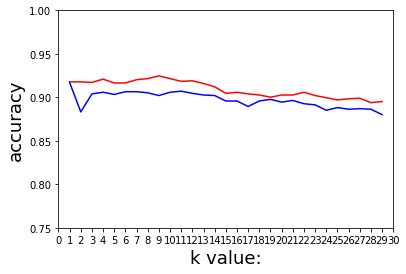

In [13]:
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 30)
plt.ylim(0.75, 1)
# 普通kNN分类精度
plt.plot(range(1,30),scores1,'r')
plt.plot(range(1,30),scores2,'b')
plt.show()

下图分别为weka KNN k=3和weka KNN k=5的可视化margin curve

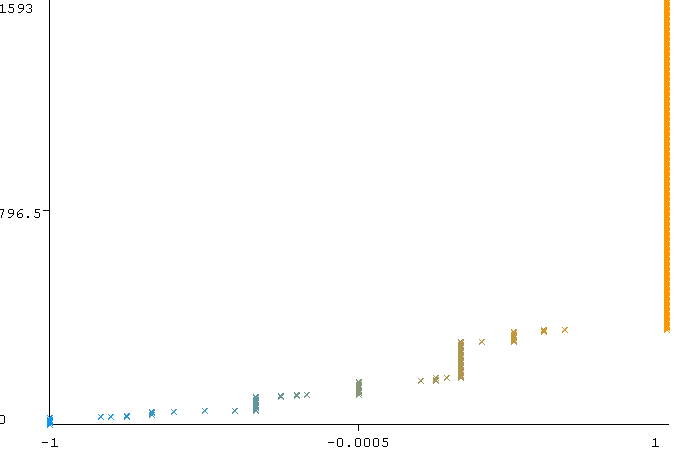

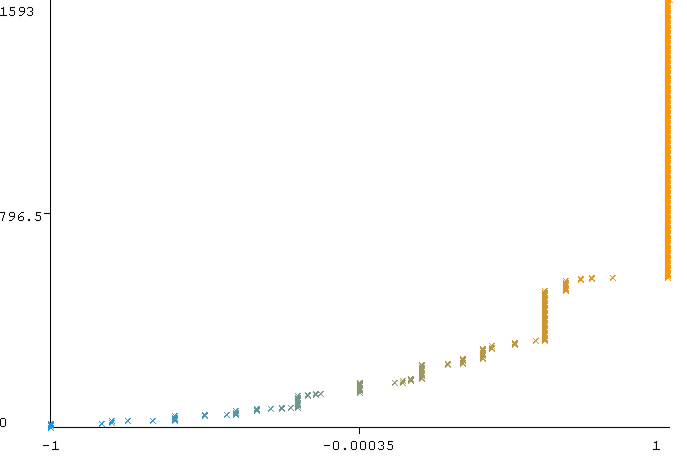